<a href="https://colab.research.google.com/github/soline013/Machine-Learning-ML/blob/master/Computer-Vision/mediapipe_objectron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install mediapipe

     |████████████████████████████████| 36.1MB 1.3MB/s 


# Import

In [4]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow

mp_drawing = mp.solutions.drawing_utils
mp_objectron = mp.solutions.objectron

# Image Load & Show

In [1]:
#We need the list format.
file_list = ["/content/Chair1.jpeg", "/content/Chair2.jpeg", "/content/Chair3.jpeg", "/content/Chair4.jpeg", "/content/Chair5.jpeg"]

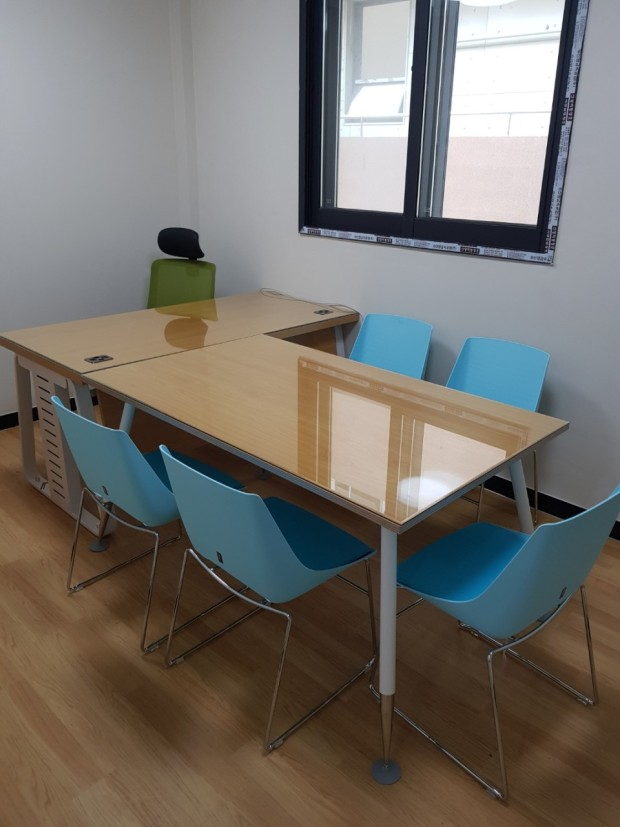

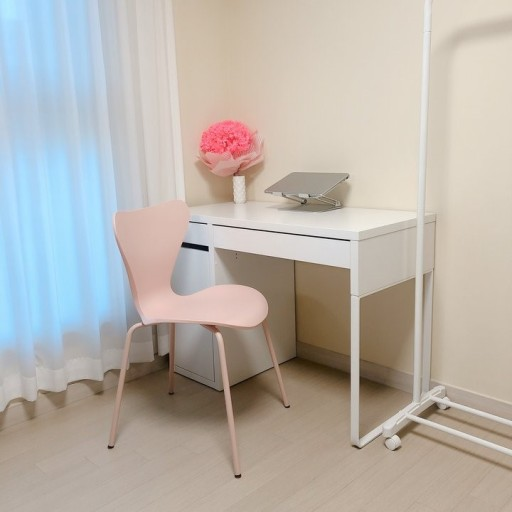

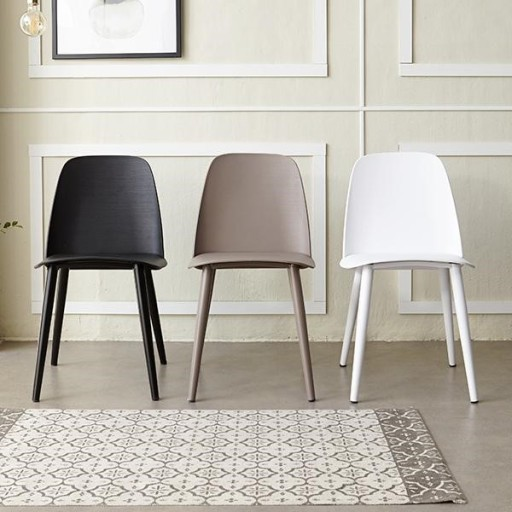

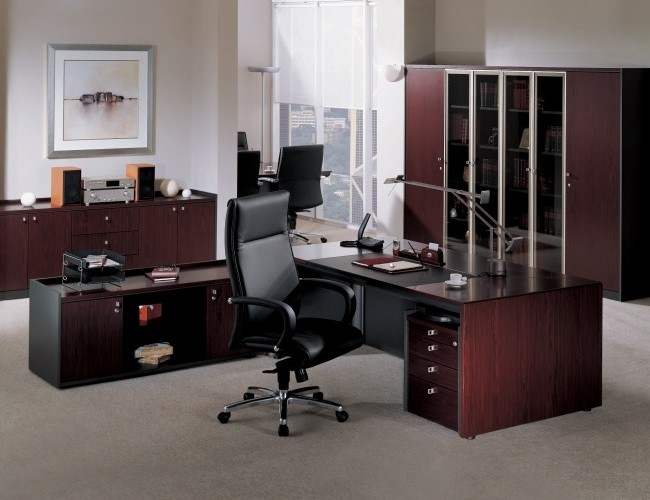

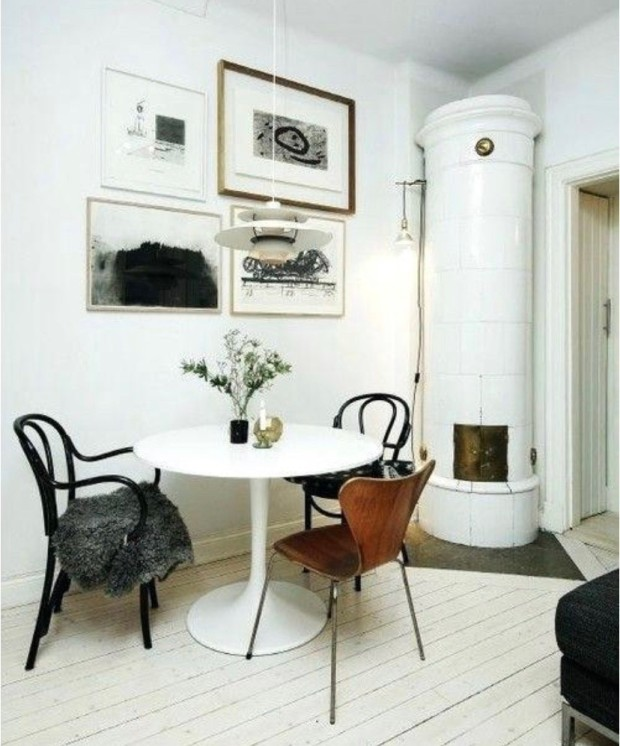

In [15]:
for file in file_list:
  img = cv2.imread(file)
  cv2_imshow(img)

# Test

## Image

No box landmarks detected on /content/Chair1.jpeg
Box landmarks of /content/Chair2.jpeg:


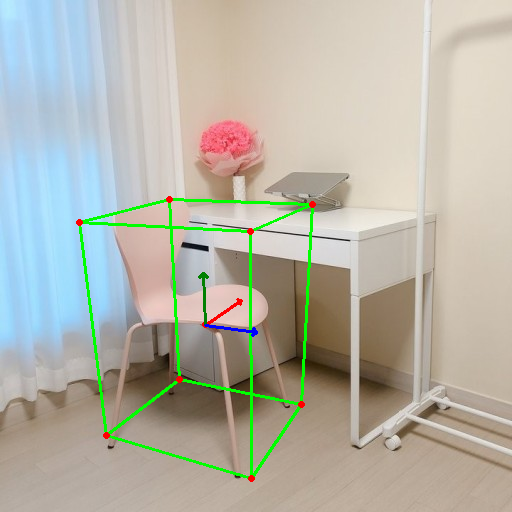

No box landmarks detected on /content/Chair3.jpeg
Box landmarks of /content/Chair4.jpeg:


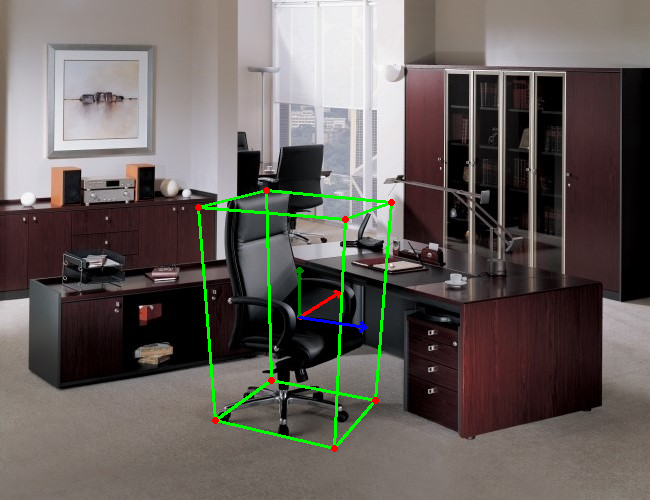

Box landmarks of /content/Chair5.jpeg:


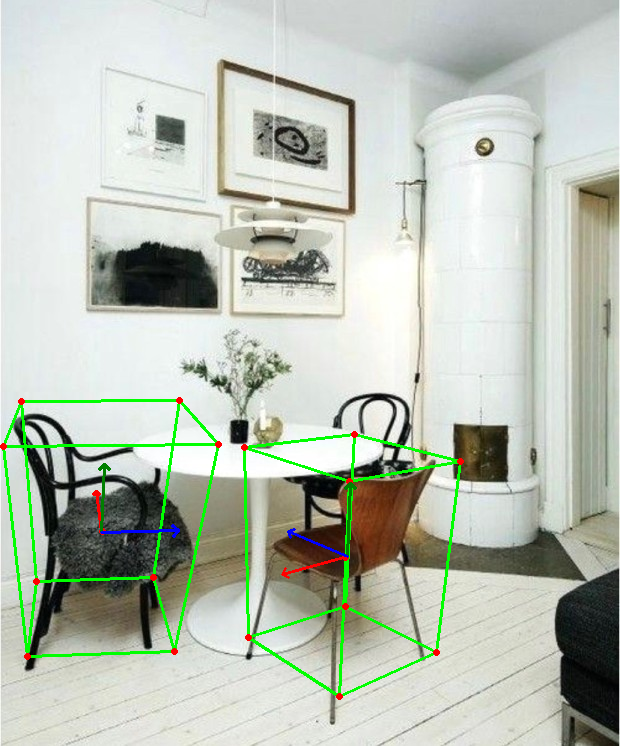

In [6]:
# For static images:
with mp_objectron.Objectron(static_image_mode=True,
                            max_num_objects=5,
                            min_detection_confidence=0.5,
                            model_name="Chair") as objectron:
  for idx, file in enumerate(file_list):
    image = cv2.imread(file)
    
    # Convert the BGR image to RGB and process it with MediaPipe Objectron.
    results = objectron.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw box landmarks.
    if not results.detected_objects:
      print(f'No box landmarks detected on {file}')
      continue
    print(f'Box landmarks of {file}:')
    annotated_image = image.copy()
    for detected_object in results.detected_objects:
      mp_drawing.draw_landmarks(annotated_image,
                                detected_object.landmarks_2d,
                                mp_objectron.BOX_CONNECTIONS)
      mp_drawing.draw_axis(annotated_image,
                           detected_object.rotation,
                           detected_object.translation)
      cv2.imwrite('tmp/annotated_image' + str(idx) + '.png', annotated_image)
    
    #Print Annotated Image.
    cv2_imshow(annotated_image)

Objectron에서 의자로 인식하기 위해 필요한 조건을 정리해보았다.

1. 정면에서 적절한 회전이 필요하다.

   정면에서는 인식이 어렵다.
  
   후면, 측면에서도 인식이 어려운지 검증할 필요가 있다.

2. 의자의 많은 영역이 사진에 드러나 있어야 한다.

   더 많은 이미지로 테스트를 진행하면 명확하게 알 수 있을 것 같다.

`추가 예정`

## Video